Computing t-SNE embedding


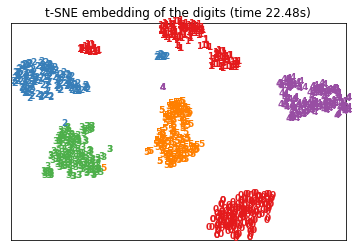

In [14]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE


def get_data():
    digits = datasets.load_digits(n_class=6)
    data = digits.data
    label = digits.target
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features


def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig


def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    result = tsne.fit_transform(data)
    fig = plot_embedding(result, label,
                         't-SNE embedding of the digits (time %.2fs)'
                         % (time() - t0))
    plt.show(fig)


if __name__ == '__main__':
    main()

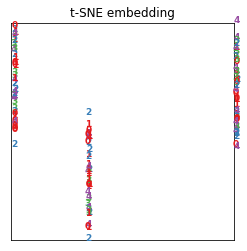

In [25]:
# demo scripts for t-sne visulization with normalization
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE
def gen_random_data(batch_size, dim, trans_num):
    '''
    batch_size: samples num
    dim: feature dim
    trans_num: total numbers of transformation
    '''
    # toy_data = np.random.randn(batch_size, dim) #random data
    
    toy_data = np.zeros([batch_size, dim])
    toy_data[:(batch_size//3), :] = toy_data[:(batch_size//3), :] + 10 # pattern1
    toy_data[(batch_size//3):(2*batch_size//3), :] = toy_data[(batch_size//3):(2*batch_size//3), :] + 20 # pattern2
    toy_data[(2*batch_size//3):, :] = toy_data[(2*batch_size//3):, :] + 40 # pattern3
    toy_data = toy_data + np.random.uniform(0,0.001,size=[batch_size, dim]) # add noise
    
    toy_label = np.random.randint(0,trans_num, size=batch_size)
    np.save('features.npy', toy_data)
    np.save('trans_label.npy', toy_label)

def load_data():
    features = np.load('features.npy')
    trans_label = np.load('trans_label.npy')
    return features, trans_label


def plot_embedding(data, label, title):
    # normalization is needed!
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(figsize=(4,4))
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    

    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

gen_random_data(batch_size=128, dim=128, trans_num=5)
features, trans_label = load_data()
tsne = TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(features)
fig = plot_embedding(result, trans_label, 't-SNE embedding')
plt.show(fig)

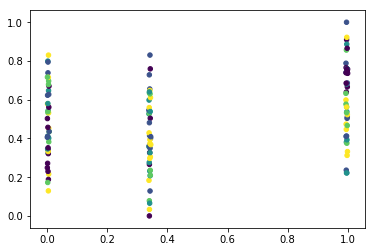

In [1]:
# demo scripts for t-sne visulization without normalization
from time import time
import pylab
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE
def gen_random_data(batch_size, dim, trans_num):
    '''
    batch_size: samples num
    dim: feature dim
    trans_num: total numbers of transformation
    '''
    # toy_data = np.random.randn(batch_size, dim) #random data
    
    toy_data = np.zeros([batch_size, dim])
    toy_data[:(batch_size//3), :] = toy_data[:(batch_size//3), :] + 10 # pattern1
    toy_data[(batch_size//3):(2*batch_size//3), :] = toy_data[(batch_size//3):(2*batch_size//3), :] + 20 # pattern2
    toy_data[(2*batch_size//3):, :] = toy_data[(2*batch_size//3):, :] + 40 # pattern3
    toy_data = toy_data + np.random.uniform(0,0.001,size=[batch_size, dim]) # add noise
    
    toy_label = np.random.randint(0,trans_num, size=batch_size)
    np.save('features.npy', toy_data)
    np.save('trans_label.npy', toy_label)

def load_data():
    features = np.load('features.npy')
    trans_label = np.load('trans_label.npy')
    return features, trans_label


def plot_embedding(data, label):
    # normalization is needed!
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    pylab.scatter(data[:,0], data[:,1], 20, label)
    pylab.show()


gen_random_data(batch_size=128, dim=128, trans_num=5)
features, trans_label = load_data()
tsne = TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(features)
plot_embedding(result, trans_label)
